<a href="https://colab.research.google.com/github/Ayman-queen/data-science-internship-tasks/blob/main/Task4_Predicting_Insurance_Claim_Amounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ MAE: 2885.16
✅ RMSE: 3431.81


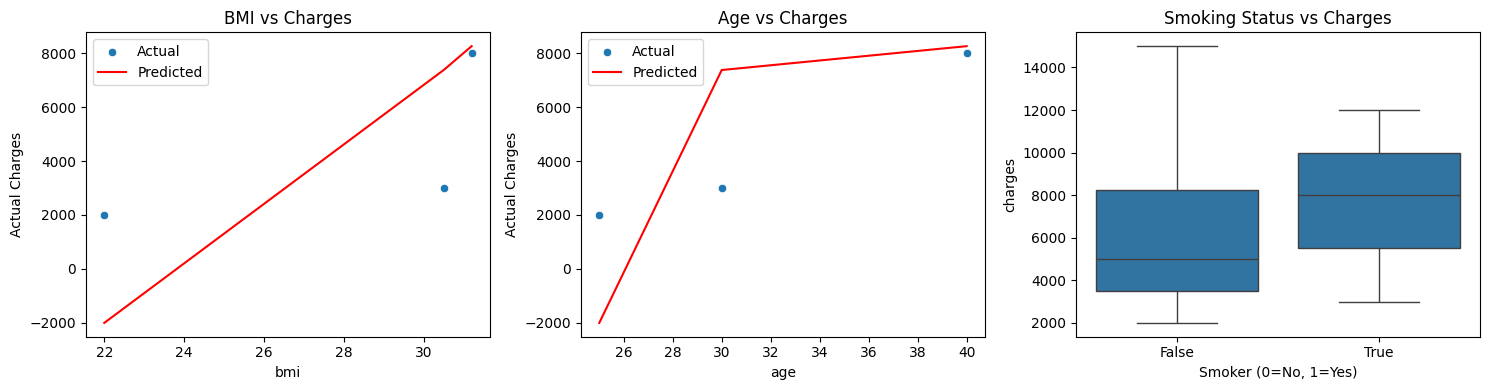

   age   bmi  Actual Charges  Predicted Charges
0   25  22.0            2000           -2010.03
1   30  30.5            3000            7379.62
5   40  31.2            8000            8265.82


In [11]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Step 2: Create Sample Insurance Dataset
data = {
    'age': [25, 30, 45, 50, 35, 40, 60],
    'bmi': [22.0, 30.5, 28.0, 33.5, 26.1, 31.2, 29.3],
    'children': [0, 1, 2, 3, 1, 2, 0],
    'charges': [2000, 3000, 6000, 12000, 4000, 8000, 15000],
    'sex': ['female', 'male', 'female', 'male', 'female', 'male', 'female'],
    'smoker': ['no', 'yes', 'no', 'yes', 'no', 'yes', 'no'],
    'region': ['southwest', 'southeast', 'northeast', 'northwest', 'southeast', 'southwest', 'northeast']
}
df = pd.DataFrame(data)

# ✅ Step 3: One-Hot Encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# ✅ Step 4: Features & Target
X = df.drop('charges', axis=1)
y = df['charges']

# ✅ Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ✅ Step 7: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")

# ✅ Step 8: Visualize
test_data = X_test.copy()
test_data['Actual Charges'] = y_test
test_data['Predicted Charges'] = y_pred

plt.figure(figsize=(15, 4))

# BMI vs Charges
plt.subplot(1, 3, 1)
sns.scatterplot(x=test_data['bmi'], y=test_data['Actual Charges'], label='Actual')
sns.lineplot(x=test_data['bmi'], y=test_data['Predicted Charges'], color='red', label='Predicted')
plt.title('BMI vs Charges')

# Age vs Charges
plt.subplot(1, 3, 2)
sns.scatterplot(x=test_data['age'], y=test_data['Actual Charges'], label='Actual')
sns.lineplot(x=test_data['age'], y=test_data['Predicted Charges'], color='red', label='Predicted')
plt.title('Age vs Charges')

# Smoking vs Charges (Boxplot from original dataset)
plt.subplot(1, 3, 3)
sns.boxplot(x=df['smoker_yes'], y=df['charges'])
plt.xlabel("Smoker (0=No, 1=Yes)")
plt.title('Smoking Status vs Charges')

plt.tight_layout()
plt.show()

# ✅ Step 9: Table of Predictions
result_df = test_data[['age', 'bmi', 'Actual Charges', 'Predicted Charges']].round(2)
pd.set_option('display.max_rows', None)
print(result_df)